## Прикладная статистика в машинном обучении

### Домашнее задание \#3: Тестирование гипотез. Байесовский подход.

In [117]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import random
sns.set(style="darkgrid")

%matplotlib inline

##*Задача 1. Всё нормально! (5 баллов)*

Майло Тэтч исследует выборку независимых одинаково распределённых случайных величин $X_1, . . ., X_𝑛$ из
нормального $N(\mu, 1)$ распределения.

a) Симулируйте такую выборку при $n$ = 100, $\mu$ = 5.

In [124]:
mu = 5
n = 100
sigma2 = 1
X = np.random.normal(mu, np.sqrt(sigma2), n)

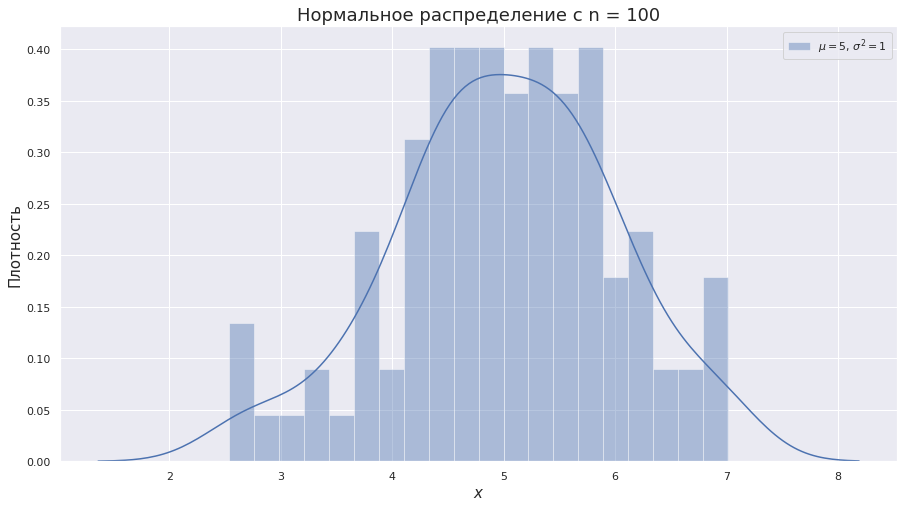

In [125]:
plt.figure(figsize=(15, 8))

sns.distplot(X, bins=20, label=r'$\mu = 5$, $\sigma^2 = 1$')

plt.xlabel(r'$x$', size=15)
plt.ylabel('Плотность', size=15)
plt.title('Нормальное распределение с n = 100', size=18)

plt.legend()
plt.show()

b) Научный опыт Майло говорит, что $f(\mu)$ непременно равна 1. Найдите апостериорную плотность $f(\mu|X)$ аналитически и постройте её график.

По формуле: 
$$f(\mu|X) = \frac{f(X|\mu) f(\mu)}{f(X)}$$

Значит с точностью до константы апостериорная плотнотность равна 
$$f(\mu|X) = C \cdot f(X|\mu) f(\mu)$$

На семинаре обсуждалось, что $$\mu|X \sim N(\overline{X}, \frac{\sigma^2}{n})$$

Таким образом в нашем случае $$\mu|X \sim N(\overline{X}, \frac{1}{100})$$

То есть: $$f(\mu|X) = \frac{1}{\sqrt{0.02\pi}} \exp\left(-\frac{(\mu - \overline{X})^2}{0.02} \right)$$

In [126]:
def mu_X(mu, av_x):
    return 10 / np.sqrt(2 * np.pi) * np.exp(-50 * (mu - av_x)**2)

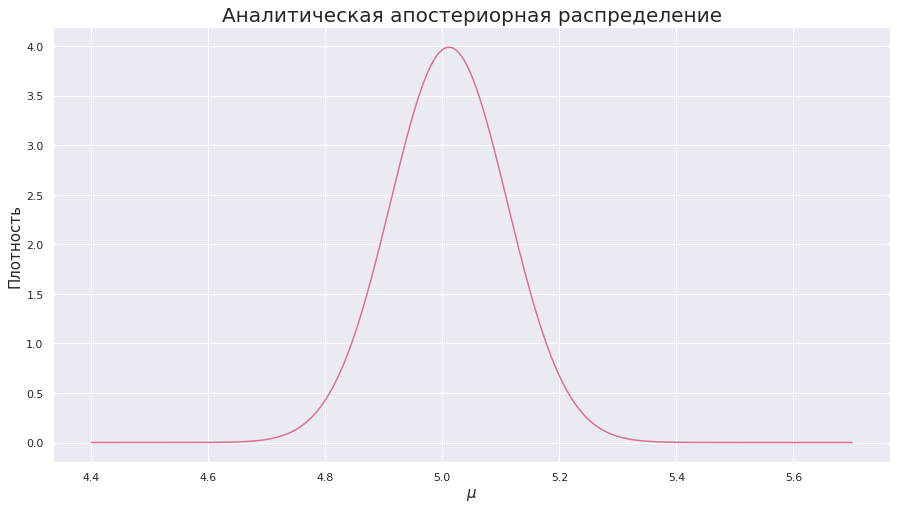

In [127]:
av_x = np.mean(X)
mus = np.arange(4.4, 5.7, 0.000001)

plt.figure(figsize=(15, 8))
plt.grid()      

plt.plot(mus, mu_X(mus, av_x), c='palevioletred')

plt.xlabel(r'$\mu$', size=15)
plt.ylabel('Плотность', size=15)
plt.title('Аналитическая апостериорная распределение', size=20)
plt.grid()
plt.show()

c) Майло не хочет хранить апостериорную функцию плотности в явном виде и желает представить апостериорное распределение в виде массива чисел. Выберите любой способ сделать это и получите такой
массив (размер массива – на ваш вкус). Постройте гистограмму полученного массива и визуально оцените, насколько хорошо она приближает аналитическую апостериорную плотность.

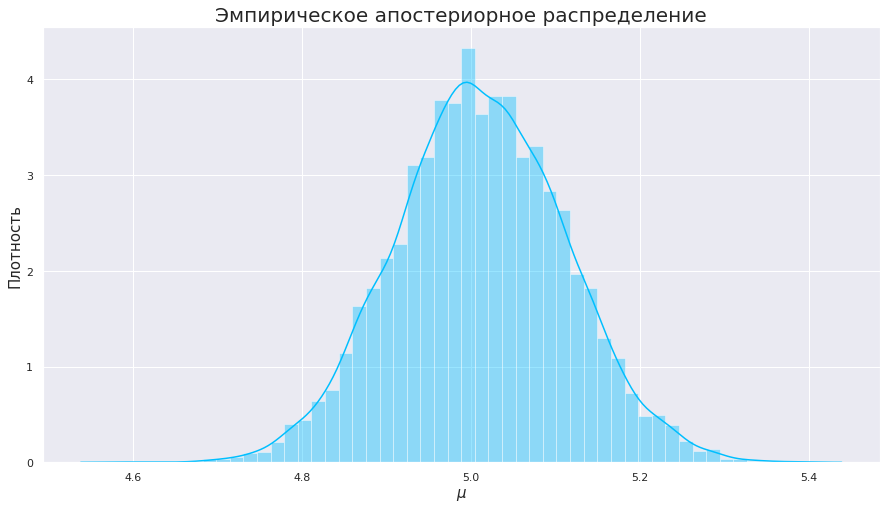

In [128]:
plt.figure(figsize=(15, 8))
plt.grid()      

sample = np.random.normal(av_x, 1/10, 10000)
sns.distplot(sample, color='deepskyblue')

plt.xlabel(r'$\mu$', size=15)
plt.ylabel('Плотность', size=15)
plt.title('Эмпирическое апостериорное распределение', size=20)
plt.grid()
plt.show()

Так как у графиков разный масштаб, то их не очень удобно сравнивать, так что нарисуем все на одном

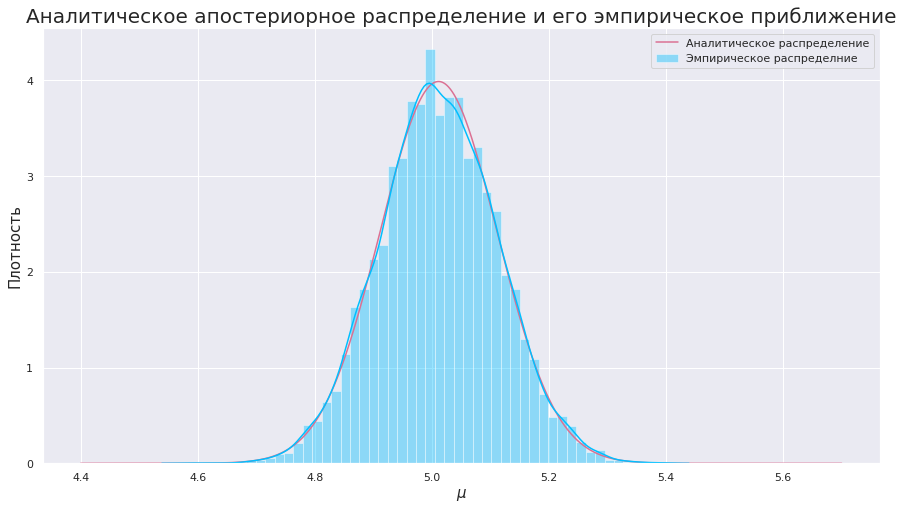

In [129]:
plt.figure(figsize=(15, 8))
plt.grid()      

plt.plot(mus, mu_X(mus, av_x), c='palevioletred', label='Аналитическое распределение')
sns.distplot(sample, color='deepskyblue', label='Эмпирическое распределние')

plt.xlabel(r'$\mu$', size=15)
plt.ylabel('Плотность', size=15)
plt.title('Аналитическое апостериорное распределение и его эмпирическое приближение', size=20)
plt.legend()
plt.grid()
plt.show()

Ну, как можно видеть, получается довольно неплохо приблизить нашу аналитическую плотность при помощи семплирования. Чем больше мы берем размер семпла, тем приближении лучше, что логично.

d) Майло считает, что недостаточно рассматривать только $\mu$: требуется изучить и $\theta = e^{\mu}$. Найдите апостериорную плотность $f(\theta|X)$ аналитически и при помощи симуляций. Для симуляций используйте следующий алгоритм:

(a) Симулируйте $Q_1, . . ., Q_B$ из апостериорного распределения $\mu|X$.

(b) Рассчитайте $\gamma_i := e^{Q_i}$. Объявите $\gamma_1, . . ., \gamma_B$ выборкой независимых одинаково распределённых случайных величин из апостериорного распределения $\theta|X$.

Будем искать апостериорную плотность аналитически так, как мы это делали на семинаре номер 13. Для этого посчитаем следующее:
$$\frac{1}{\sqrt{0.02\pi}} \int \limits_{0}^{\ln{g}} e^{-\frac{(\mu - \overline{X})^2}{0.02}} d\mu$$

$$h'(g|X) = \frac{1}{\sqrt{0.02\pi}} \left(e^{-\frac{(\ln g - \overline{X})^2}{0.02}} \cdot \frac{1}{g}\right)$$

$$f(\theta|X) = h'(g|X) = \frac{1}{\sqrt{0.02\pi}} \left(e^{-\frac{(\ln g - \overline{X})^2}{0.02}} \cdot \frac{1}{g}\right) = \left[g = \frac{1}{e^{\mu}}\right] = \frac{1}{\sqrt{0.02\pi}} \left(e^{-\frac{(\mu- \overline{X})^2}{0.02}} \cdot \frac{1}{e^{\mu}}\right) $$

Вспомним, чо у нас $\theta=e^{\mu}$ и напишем итоговую формулу

In [130]:
def theta_X(theta, av_x):
    return 1 / np.sqrt(0.02 * np.pi) * (np.exp(-(np.log(theta) - av_x)**2/0.02) * 1/theta)

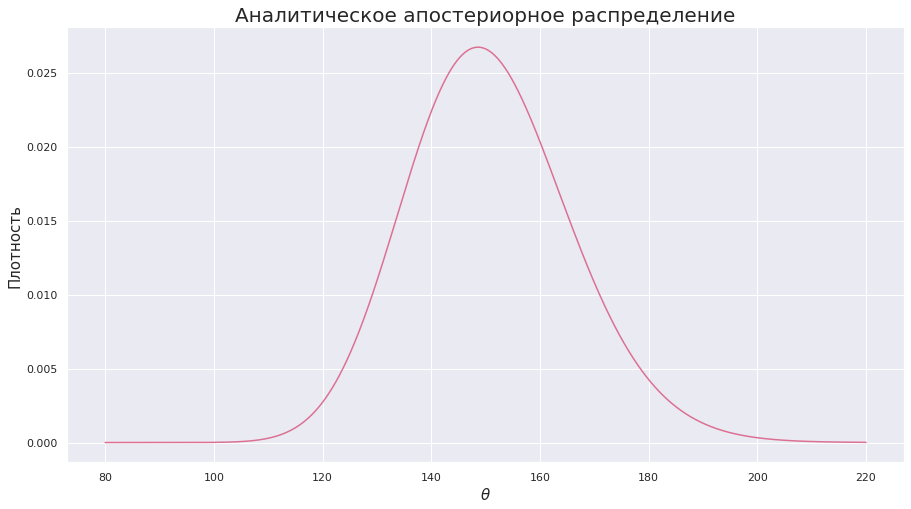

In [131]:
thetas = np.arange(80, 220, 0.00001)

plt.figure(figsize=(15, 8))
plt.grid()      

plt.plot(thetas, theta_X(thetas, av_x), c='palevioletred')

plt.xlabel(r'$\theta$', size=15)
plt.ylabel('Плотность', size=15)
plt.title('Аналитическое апостериорное распределение', size=20)
plt.grid()
plt.show()

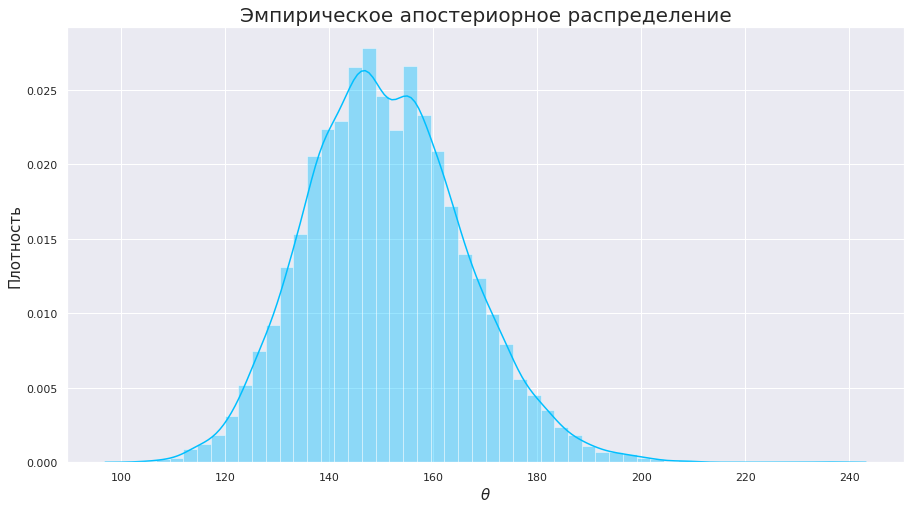

In [132]:
Qs = np.random.normal(av_x, 1/10, 10000)  #симулируем Q_i
gammas = np.exp(Qs)  #рассчитывем gamma_i по формуле

plt.figure(figsize=(15, 8))
plt.grid()      

sns.distplot(gammas, color='deepskyblue')

plt.xlabel(r'$\theta$', size=15)
plt.ylabel('Плотность', size=15)
plt.title('Эмпирическое апостериорное распределение', size=20)
plt.grid()
plt.show()

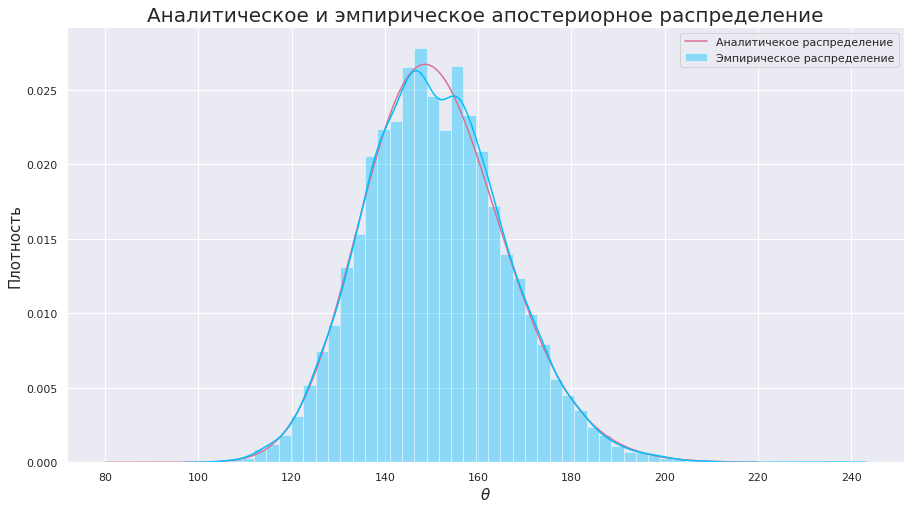

In [133]:
plt.figure(figsize=(15, 8))
plt.grid()      

plt.plot(thetas, theta_X(thetas, av_x), c='palevioletred', label='Аналитичекое распределение')
sns.distplot(gammas, color='deepskyblue', label='Эмпирическое распределение')

plt.xlabel(r'$\theta$', size=15)
plt.ylabel('Плотность', size=15)
plt.title('Аналитическое и эмпирическое апостериорное распределение', size=20)
plt.legend()
plt.grid()
plt.show()

Ну и снова можем заметить, что нам удалось довольно хорошо приблизить аналитическую апостериорную плотность с помощью симуляции.

e) Постройте 95%-ый байесовский доверительный интервал для $\mu$.

В нашем случае байесовский доверительный интвервал будет иметь вид:
$$[\overline{X} - 1.96b; \overline{X} + 1.96b]$$
Где $b$ - корень из апостериорной дисперсии $\mu$, то есть в нашем случае $\sqrt{\frac{1}{100}} = \frac{1}{10}$

In [134]:
b = 1 / 10

In [135]:
print('95% байесовский доверительный интервал: [', av_x - 1.96*b, ', ', av_x + 1.96*b, ']', sep='')

95% байесовский доверительный интервал: [4.815312431752152, 5.207312431752151]


f) Постройте 95%-ый частотный доверительный интервал для $\mu$.

Частотный (асимптотический) доверительный интервал выглядит таким образом:

<img src="https://sun9-57.userapi.com/impf/QSJlRYObh2i96u9Z6veI4udlEdRh2FZMeLm9Rg/63rRFa66eSQ.jpg?size=908x156&quality=96&proxy=1&sign=bc88bdd2a66cdff944952fefc2e5e097&type=album">

Где $S = \frac{\sigma}{\sqrt{n}}$, $\sigma$ - это корень из дисперсии $X$, то есть в нашем случае 1, а $n$ - число наблюдений, то есть у нас 100. Таким образом $S = \frac{1}{10}$

In [136]:
S = 1 /10

In [137]:
print('95% частотный доверительный интервал: [', av_x - 1.96*S, ', ', av_x + 1.96*S, ']', sep='')

95% частотный доверительный интервал: [4.815312431752152, 5.207312431752151]


Можно заметить, что они совпали.

##*Задача 2. Необычная флора (5 баллов)*
Оказавшись в Атлантиде, Майло Тэтч изучает местную флору. В частности, ему интересно, как влияют привычные удобрения на рост местного вида папоротников. Майло собирает случайную выборку из 500 папоротников и разделяет её на пять непересекающихся групп по 100 наблюдений в каждой. К четырём из них он применяет удобрения разных видов, а пятая группа объявляется контрольной. Результаты эксперимента приведены в таблице ниже. В первой строке указаны виды применяемых удобрений, а во второй – число растений, для которых наблюдались улучшения в росте.

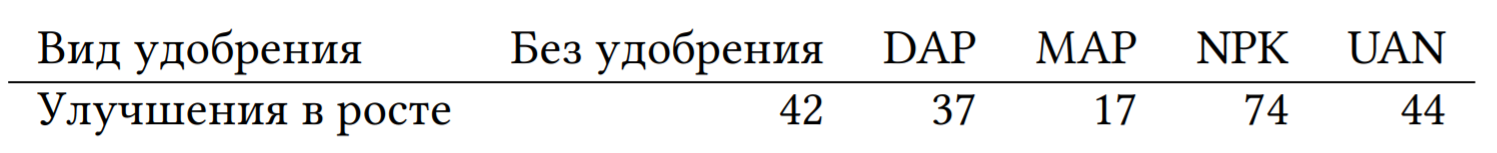

a) Сформулируйте гипотезы о наличии (отсутствии) эффекта действия каждого удобрения. Проверьте каждую гипотезу на уровне значимости 5%. Можно считать, что число наблюдений достаточно для применения асимптотических результатов. Для получения оценок используйте метод максимального правдоподобия.

Сформулруем гипотезу о наличиии эффекта каждого удобрения:

\begin{equation*}
 \begin{cases}
    H_{0,i}: p_i = p_2\\
    H_{1,i}: p_i \ne p_2
 \end{cases}
\end{equation*}

Где $p_i$ - это соотвественно вероятность того, что $i$-ое удобрение вызвало улучшения в росте растения, а $p_2$ вероятность того, что растение без удобрения улучшилось в росте.

Протестируем каждую из гипотез методом LR.

Но для начала, поймем, что каждая случайная величина у нас будет иметь биномиальное распределение (и вообще в целом задача похожа на 1 из кр...). Тогда просто воспользуемся формулами, которые выводили на кр и все... (решение кр кидала в телеграмме)

А именно:

$$LR = 2(l(\hat{p_1}, \hat{p_2}) - l(p_{1, H_0}, p_{2, H_0}))$$
$$\hat{p_1} = \frac{X_1}{N_1}, \ \hat{p_2} = \frac{X_2}{N_2}, \ \hat{p}_{1, H_0} = \frac{X_1 + X_2}{N_1 + N_2}$$
$$l(\hat{p_1}, \hat{p_2}) = const + X_1\ln(\frac{X_1}{N_1}) + X_2\ln(\frac{X_2}{N_2}) + (N_1 - X_1)\ln(1 - \frac{X_1}{N_1}) + (N_2 - X_2)\ln(1 - \frac{X_2}{N_2})$$
$$l(p_{1, H_0}, p_{2, H_0}) = const + (X_1 + X_2)\ln(\hat{p}_{1,H_0}) + (N_1+N_2-X_1-X_2)\ln(1 - \hat{p}_{1,H_0})$$

В нашем случае $$N_1 = N_2 = 100, \ X_2 = 42, X_1 = X_i$$

Теперь проведем сложные математические вычисления на калькуляторе для каждого пункта:

DAP:
$$\hat{p}_{1,H_0} = \frac{79}{200}$$
$$l(\hat{p_1}, \hat{p_2}) = const + 37\ln(\frac{37}{100}) + 42\ln(\frac{42}{100}) + (100 - 37)\ln(1 - \frac{37}{100}) + (100 - 37)\ln(1 - \frac{37}{100}) \approx const - 133.92$$
$$l(p_{1, H_0}, p_{2, H_0}) = const + (37 + 42)\ln(\frac{79}{200}) + (100 + 100 - 37 - 42)\ln(1 - \frac{79}{200}) \approx const - 144.19$$
$$LR = 2(const - 133.92 - const + 144.19) = 0.54$$ 
$0.54 < 3.84$, значит гипотеза не отвергается, значит удобрение $DAP$ не оказывает эффект на растения

MAP:
$$\hat{p}_{1,H_0} = 59/200$$
$$l(\hat{p_1}, \hat{p_2}) \approx const - 113.62$$
$$l(p_{1, H_0}, p_{2, H_0}) \approx const - 121.31$$
$$LR = 2(const - 113.62 - const + 121.31) = 15.38$$
$15.38 > 3.84$, значит гипотеза отвергается, значит удобрение $MAP$ оказывает эффект на растения

NPK:
$$\hat{p}_{1,H_0} = 116/200$$
$$l(\hat{p_1}, \hat{p_2}) \approx const - 125.33$$
$$l(p_{1, H_0}, p_{2, H_0}) \approx const - 136.06$$
$$LR = 2(const - 125.33 - const + 136.06) = 21.46$$
$21.46 > 3.84$, значит гипотеза отвергается, значит удобрение $NPK$ оказывает эффект на растения


UAN:
$$\hat{p}_{1,H_0} = 86/200$$
$$l(\hat{p_1}, \hat{p_2}) \approx const - 136.62$$
$$l(p_{1, H_0}, p_{2, H_0}) \approx const - 136.66$$
$$LR = 2(const - 136.62 - const + 136.66) = 0.08$$
$0.08 < 3.84$, значит гипотеза не отвергается, значит удобрение $UAN$ не оказывает эффект на растения

b) Проведите процедуру множественного тестирования методом Бонферрони. Изменились ли результаты?
Напоминание: при полученной статистике $z_{obs}$ $p-value$ можно рассчитать как $2P\{Z \leq z_{obs}|H_0\}$ для двустороннего теста в случае симметричного распределения.


Так как я считала не через z-test, а через LR (Вова разрешил), то p-value буду считать на этом прекрасном сайте:

https://stattrek.com/online-calculator/chi-square.aspx

Получили следующее:

$$DAP: p-value = 0.46$$
$$MAP: p-value = 0.0001$$
$$NPK: p-value = 0$$
$$UAN: p-value = 0.78$$


Таким образом теперь сравним полученные значения с $\alpha/ 4 = 0.05 / 4 = 0.0125$

$DAP: 0.46 > 0.0125$, значит гипотеза не отвергается 

$MAP: 0.0001 < 0.0125$, значит гипотеза отвергается 

$NPK: 0 < 0.0125$, значит гипотеза отвергается 

$UAN: 0.78 > 0.0125$, значит гипотеза не отвергается 

Как можно заметить, результаты не изменились.


c) Проведите процедуру множественного тестирования методом Бенджамини-Хохберга. Изменились ли
результаты?


На семинаре был следующий алгоритм для теста Бенджамини-Хохберга:

<img src="https://sun9-32.userapi.com/impf/18RckdYt4SkXtyZnqGj8rPfrKqc0tgbjswBACw/BIKBQXpy0ow.jpg?size=1117x758&quality=96&proxy=1&sign=38a0cb9063b1ff2410a65eafd77634e9&type=album">

Для начала отсортируем наши $p-value$ по возрастанию. Получим:

$$0, 0.0001, 0.46, 0.78$$

В нашем случае $c_m = 1$, так как величины независимы 

Теперь посчитаем значения $l_i$:

$l_1 = \frac{1 \cdot 0.05}{1 \cdot 4} = 0.0125$

$l_2 = \frac{2 \cdot 0.05}{1 \cdot 4} = 0.025$

$l_3 = \frac{3 \cdot 0.05}{1 \cdot 4} = 0.0375$

$l_4 = \frac{4 \cdot 0.05}{1 \cdot 4} = 0.05$

Заметим, что в нашем случае $R = 2$, значит $T = 0.0001$. 

Теперь сравним наши $p-value$ с $T$:

$DAP: 0.46 > 0.0001$, значит гипотеза не отвергается 

$MAP: 0.0001 = 0.0001$, значит гипотеза отвергается 

$NPK: 0 < 0.0001$, значит гипотеза отвергается 

$UAN: 0.78 > 0.0001$, значит гипотеза не отвергается 

Как можно заметить, результаты снова не изменились...









d) Сделайте итоговый вывод о наличии эффекта действия каждого удобрения.

Таким образом, все 3 теста нам дали одинаковые результаты, а именно следующие:

$DAP:$ $H_0$ не отвергается

$MAP:$ $H_0$ отвергается 

$NPK:$ $H_0$ отвергается 

$UAN:$ $H_0$ не отвергается 

Таким образом удобрения $DAP, UAN$ не оказывают влияния на рост растений, а удобрения $MAP, NPK$ оказывают. Причем $MAP$ влияет в худшую сторону, то есть растения растут хуже, чем без удобрений, а $NPK$ наоборот в лучшую - растения растут лучше, чем без удобрений

e) Результаты тестирования удобрения MAP смутили Майло: они никак не согласовывались с его научным
опытом. Поэтому для исследования эффекта действия этого удобрения Майло решил использовать байесовский подход. Пусть теперь $p_{MAP}$ – случайная величина, и Майло уверен, что $p_{MAP} ∼ Beta(\alpha, \beta)$.
Найдите какую-нибудь (на ваш выбор) точечную байесовскую оценку параметра $p_{MAP}$. Прокомментируйте, насколько сильно различаются частотная и байесовская оценки и поясните почему

Сделаем почти то, что мы делали в 1 номере на семинаре номер 13

Есть $X_1, ..., X_{100}$ - выборка независимых одинаково распределенных случайных величин, имеющих распределение Бернулли с параметром $p$. И $f(p) \sim Bern(p)$.

Тогда (вывели на семинаре): 
$$f(p|X) = C \cdot f(X|p) \cdot f(p) = C \cdot p^{s + \alpha - 1} \cdot (1-p)^{n - s + \beta - 1}$$
$$p|X \sim Beta(s + \alpha, n - s + \beta)$$
 где $s = \sum\limits_i x_i$, а $n$ - количество измерений

И тогда оценка имеет следующую формулу (ну может иметь и другую, но возьмем ту, что была на семинаре)
 $$\hat{p}_{MAP} = \frac{s + \alpha}{s + \alpha + n - s + \beta}$$

Попробуем рассмотреть разные параметры $\alpha, \ \beta$, что нам еще делать...

In [138]:
s = 17  #сумма x-ов
n = 100
result = []
alphas = np.arange(1, 60, 5)
betas = np.arange(1, 60, 5)
for a in alphas:
    for b in betas:
        res = (s + a) / (s + a + n - s + b)
        print('При alpha = ', a, ', beta = ', b,  ': p_MAP = ', res, sep='')

При alpha = 1, beta = 1: p_MAP = 0.17647058823529413
При alpha = 1, beta = 6: p_MAP = 0.16822429906542055
При alpha = 1, beta = 11: p_MAP = 0.16071428571428573
При alpha = 1, beta = 16: p_MAP = 0.15384615384615385
При alpha = 1, beta = 21: p_MAP = 0.14754098360655737
При alpha = 1, beta = 26: p_MAP = 0.14173228346456693
При alpha = 1, beta = 31: p_MAP = 0.13636363636363635
При alpha = 1, beta = 36: p_MAP = 0.13138686131386862
При alpha = 1, beta = 41: p_MAP = 0.1267605633802817
При alpha = 1, beta = 46: p_MAP = 0.12244897959183673
При alpha = 1, beta = 51: p_MAP = 0.11842105263157894
При alpha = 1, beta = 56: p_MAP = 0.11464968152866242
При alpha = 6, beta = 1: p_MAP = 0.21495327102803738
При alpha = 6, beta = 6: p_MAP = 0.20535714285714285
При alpha = 6, beta = 11: p_MAP = 0.19658119658119658
При alpha = 6, beta = 16: p_MAP = 0.1885245901639344
При alpha = 6, beta = 21: p_MAP = 0.18110236220472442
При alpha = 6, beta = 26: p_MAP = 0.17424242424242425
При alpha = 6, beta = 31: p_MAP = 

Как мы посчитали в предыдущих пунктах: $\hat{p}_{ML} = X_1 / N_1 = 0.17$

Таким образом можем заметить, что байесовская оценка с разными парметрами в целом отличается от частнотной очень по-разному, и зависит это от значений параметров. Можем заметить, что максимальное значение вышло $\approx 0.47$ при $\alpha = 56, \ \beta = 1$, а минимальное $\approx 0.11$ при $\alpha = 1, \ \beta = 56$ В целом можно заметить общую тенденцию, что при увеличении $\alpha$ значение оценки растет, а при увеличении $\beta$ наоборот уменьшается. А минимальное и максимальное значения у нас как раз вышли на краях интервалов. 

Если говорить вообще о том, как устроена байесовская оценка, то на семинаре мы вывели следующее:
<img src="https://sun9-66.userapi.com/impf/Ykv-l_mP7VDBqFjc7dFXL6YsjIAhlKHLqlENfw/PFb5TGtujXM.jpg?size=859x242&quality=96&proxy=1&sign=47271d20759b27ce131feb8cd01e8a17&type=album">

То есть поняли, что оценка состоит из взвешенной суммы частотной оценки, полученной при помощи ММП и матожидания априорного распределение $p$. Таким образом изменяя параметры $\beta$ мы изменяем матожидание $p$ (напомню, что $p \sim Beta(\alpha, \beta)$). Таким образом байесовская оценка меняется в ту или иную сторону.

Наглядно посмотрим, какие у нас значения матожидания при $\alpha = 56, \ \beta = 1$ и $\alpha = 1, \ \beta = 56$.

In [141]:
res_1 = np.random.beta(56, 1, 1000)
res_2 = np.random.beta(1, 56, 1000)

print('Матожидание при alpha = 56, beta = 1: p_MAP =', np.mean(res_1))
print('Матожидание при alpha = 1, beta = 56: p_MAP =', np.mean(res_2))

Матожидание при alpha = 56, beta = 1: p_MAP = 0.9817646107865938
Матожидание при alpha = 1, beta = 56: p_MAP = 0.016502272578495906


Собственно вот, как мы видим, матожидание в первом случае очень большое, а во втором очень маленькое, таким образом в первом случае выходит большое значение у байесовской оценки, а во втором маленькое. 

Попробуем подобрать такие парметры, чтобы матожидание было примерно 0.5, чтобы оно согласовалось с нашим представлением о реальности (ну или нет).

In [165]:
res = np.random.beta(40, 40, 1000)

print('Матожидание при alpha = 40, beta = 40: p_MAP ', np.mean(res))

Матожидание при alpha = 40, beta = 40: p_MAP  0.5027761293534808


Ну вот, например $\alpha = 40, \ \beta = 40$ нам подходит, значение почти 0.5

Посчитаем, чему равно значение $\hat{p}_{MAP}$ при таких параметрах.

In [166]:
v = (s + 40) / (s + 40 + n - s + 40)
print('При alpha = 40, beta = 40: ''p_MAP = ', v, sep='')

При alpha = 40, beta = 40: p_MAP = 0.31666666666666665


Ну вот что-то такое.

Заметим, что оценка больше нашей оценки ММП почти в 2 раза.